In [ ]:
На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. 
Для борьбы с каждым типом кораблей используется свой вид оружия. 
Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, 
чтобы успешно отбить нападения на различные области планеты
Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. 
Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [12]:
# пора добавить в питон команд import world as wd
import pandas as pd
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [4]:
# читаем сразу оба файла (обучающй и тестовый) 
stat_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\invasion.csv')
test_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\operative_information.csv')

In [14]:
# посмотрим в данные
stat_data

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [8]:
# посмотрим что содержится в колонке категориальных переменных
stat_data['class'].value_counts()

fighter      225
transport    205
cruiser       70
Name: class, dtype: int64

In [10]:
# чек на отсутствующие данные
stat_data.isna().sum()

class                 0
g_reflection          0
i_reflection          0
speed                 0
brightness            0
time_of_observance    0
volume                0
dtype: int64

<AxesSubplot:>

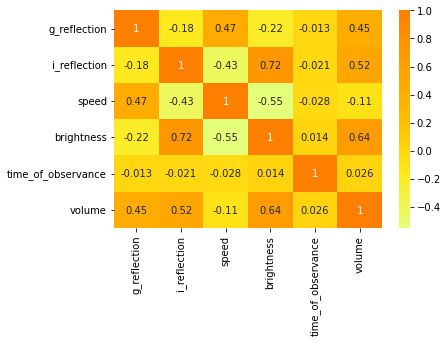

In [13]:
# чек тепловой картой на сильно коррелирующие переменные
corr = stat_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [19]:
# сплитим данные на X, y. Тестовые идут отдельным файлом
X = stat_data.drop(columns = 'class')
y = stat_data['class']
y

0      transport
1      transport
2      transport
3        fighter
4        fighter
         ...    
495      fighter
496    transport
497      fighter
498      fighter
499    transport
Name: class, Length: 500, dtype: object

In [20]:
# скопировал блок. Задолбался переписывать одно и то же. Экземпляр, параметры, грид, параметры, фит
clf_rf = RandomForestClassifier(random_state=0, n_jobs=-1)
parametrs = {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 13, 2), 'min_samples_split': range(2, 10, 2), 'min_samples_leaf': range(1, 8)}
gs_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)
gs_cv_clf.fit(X, y)
gs_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [35]:
# сразу одной строкой по порядку: лучший оценщик, предиктим по тест дата, оформляем дата фрейм, подсчитываем вэлью каунтс
pd.DataFrame(gs_cv_clf.best_estimator_.predict(test_data)).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [ ]:
Ответ: 230 595 675

<AxesSubplot:>

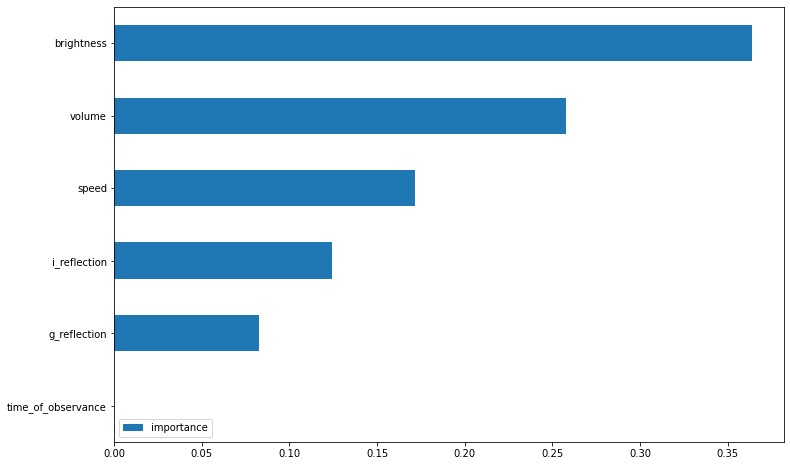

In [37]:
# находим вес фичей
gs_cv_clf.best_estimator_.feature_importances_
imp = pd.DataFrame(gs_cv_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
Ошибка! Брайтнесс сильно коррелирует с другим признаком, поэтому в совокупности выходит на 1 место. Нужно убрать корреляцию и 
пересчитать.